In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats



def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio1_ETL.csv'
portfolio1 = load_data(filepath)

portfolio1 = portfolio1.drop(columns=['id'])
portfolio1.head()

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
0,0.65,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.59,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.01,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.86,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.73,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

pca = PCA(n_components = None, random_state = random_state)
pca_p1 = pca.fit_transform(portfolio1)
pca.explained_variance_ratio_

array([4.79555152e-01, 3.77872960e-01, 1.16714914e-01, 1.86243389e-02,
       1.03806889e-03, 5.36064247e-04, 5.03457997e-04, 4.74694989e-04,
       4.36342090e-04, 4.16890826e-04, 4.04622283e-04, 3.35464108e-04,
       3.03042017e-04, 2.78646197e-04, 2.48718969e-04, 2.19716735e-04,
       1.86632728e-04, 1.70305199e-04, 1.38224693e-04, 1.23668101e-04,
       9.75180855e-05, 9.42516247e-05, 8.62055269e-05, 7.97968663e-05,
       7.63215770e-05, 7.30018592e-05, 6.60912808e-05, 6.24849838e-05,
       5.78700858e-05, 5.52989365e-05, 5.09911329e-05, 4.56760762e-05,
       4.22002571e-05, 4.03036925e-05, 3.90775531e-05, 3.65237104e-05,
       3.49703805e-05, 3.44616411e-05, 3.18064280e-05, 3.11018889e-05,
       2.80963028e-05, 2.53429260e-05, 2.28394078e-05, 2.18873149e-05,
       2.08805364e-05, 1.98901871e-05, 1.89067307e-05, 1.76529742e-05,
       1.64244667e-05, 1.26118087e-05, 1.12900383e-05, 9.14630678e-06,
       7.10610376e-06, 6.22829757e-06, 6.09244859e-06, 5.37650856e-06,
      

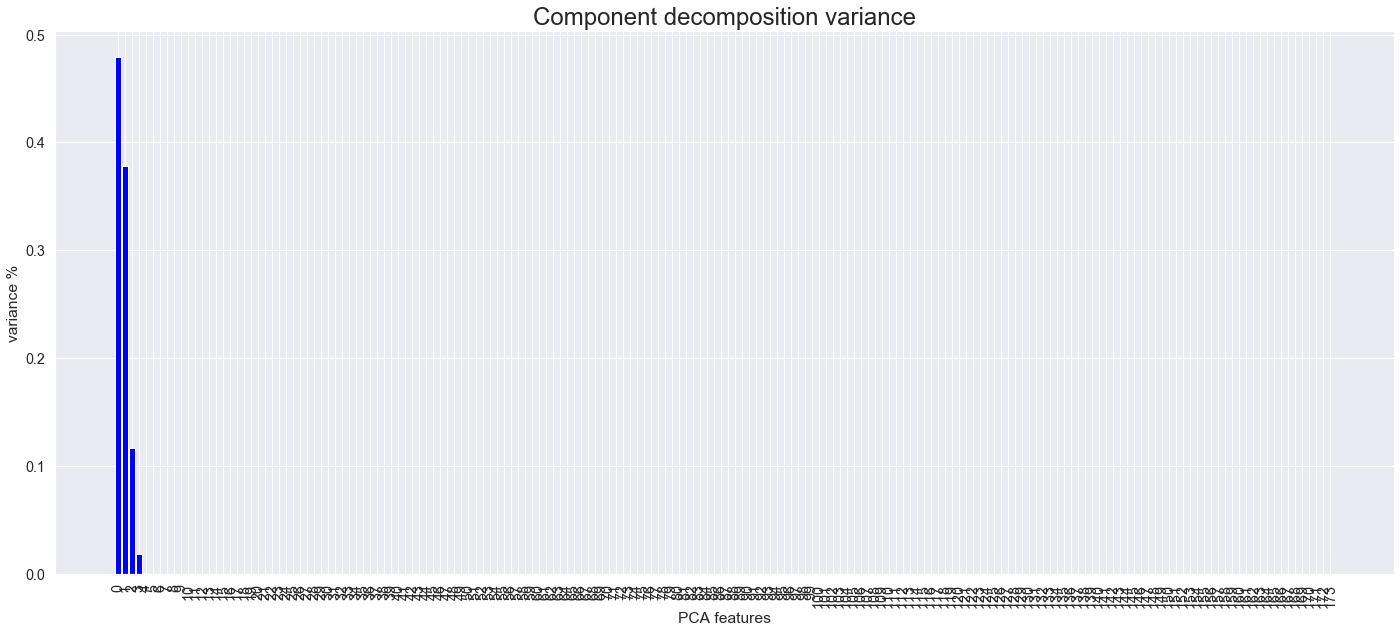

In [3]:
sns.set(font_scale = 1.3)
features = range(pca.n_components_)
plt.figure(figsize=(24,10))
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.title("Component decomposition variance", fontsize=24)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(rotation=90)
plt.xticks(features)
plt.show()

In [4]:
#Just so we can fix a point between attempts we'll work with every compononet that is higher that 2.5%
components_limit = 0.025
components = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > components_limit]
number_components = len(components)

pca = PCA(n_components = number_components, random_state = random_state) 
X = pca.fit_transform(portfolio1)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.47955515, 0.37787296, 0.11671491]), 0.9741430253146911)

In [5]:
pca = PCA(n_components = number_components, random_state = random_state)
pca_p1 = pca.fit_transform(portfolio1)
inverse_transform_p1 = pca.inverse_transform(pca_p1)

print("portfolio1 shape",portfolio1.shape)
print("pca_p1 shape",pca_p1.shape)
print("inverse_transform_p1 shape",inverse_transform_p1.shape)

portfolio1 shape (555, 174)
pca_p1 shape (555, 3)
inverse_transform_p1 shape (555, 174)


In [6]:
MSE_score = ((portfolio1-inverse_transform_p1)**2).sum(axis=1)

MSE_score.head()

0     6.176774
1     4.661371
2     6.760386
3    10.732122
4    12.010955
dtype: float64

In [7]:
MSE_score.sort_values(ascending=False)

426    482.580443
182    427.673422
476    422.922144
294    408.671206
141    398.293599
          ...    
270      2.620779
53       2.611614
369      2.474281
280      2.452541
324      2.435730
Length: 555, dtype: float64

In [8]:
MSE_score.mean()

17.849011422549324

In [9]:
MSE_max_scores = MSE_score.nlargest(9).index

portfolio1.iloc[MSE_max_scores]

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
426,6.36,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,15.48,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,19.17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,17.56,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,31.66,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341,8.44,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,5.23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366,24.59,0,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,10.63,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Interquartile Range Method
q25, q75 = np.percentile(MSE_score, 25), np.percentile(MSE_score, 75)
iqr = q75 - q25

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=4.851, 75th=7.817, IQR=2.966


In [11]:
cut_off = iqr * 1.5
upper = q75 + cut_off
upper, cut_off

(12.26569583054333, 4.448664574954728)

In [12]:
outliers = [x for x in MSE_score if x > upper]
print('Identified outliers: %d' % len(outliers))
len(MSE_score)

Identified outliers: 56


555

In [13]:
outliers_removed = [x for x in  MSE_score if x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 499


In [14]:
MSE_array = np.array(MSE_score)

indices = [np.where(MSE_array==x)[0][0] for x in outliers_removed]
no_outliers_p1 = portfolio1.iloc[indices]
no_outliers_p1.shape

(499, 174)

In [15]:
def load_data(df,filepath):
    '''
    Input
    pandas dataframe and the filepath to save the dataframe
    Output
    File with the pandas dataframe
    '''
    df.to_csv(filepath, index = False)
    
filepath_save = '../data/portfolio1_no_outliers.csv'
load_data(no_outliers_p1,filepath_save)